# Data Augmentation Experiment
In this notebook I will use the same base model from previous and attempt data augmentation to see if it has an impact on results.

In [2]:
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
display(HTML(""))

In [4]:
from tensorflow.keras import backend as K
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from tensorflow.keras.preprocessing import image
import os, shutil # Library for navigating files
# from google.colab import drive # Library to mount google drives
np.random.seed(1)
import tensorflow as tf
print(tf.__version__)
!python --version

2.15.0
Python 3.11.4


# Setup Plot for Model Testing

In [10]:
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

# Data Directory 

In [5]:
base_dir = 'bvsc'
# Specify the traning, validation, and test dirrectories.
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
# Specify the the classess in the training, validataion, and test dirrectories
train_cfiles_dir = os.path.join(train_dir, 'cFiles')
train_bfiles_dir = os.path.join(train_dir, 'bFiles')
validation_cfiles_dir = os.path.join(validation_dir, 'cFiles')
validation_bfiles_dir = os.path.join(validation_dir, 'bFiles')
test_cfiles_dir = os.path.join(test_dir, 'cFiles')
test_bfiles_dir = os.path.join(test_dir, 'bFiles')
# Check the number of files in each class dirrectory
print(len(os.listdir(train_cfiles_dir)))
print(len(os.listdir(train_bfiles_dir)))
print(len(os.listdir(validation_cfiles_dir)))
print(len(os.listdir(validation_bfiles_dir)))
print(len(os.listdir(test_cfiles_dir)))
print(len(os.listdir(test_bfiles_dir)))

1000
1000
500
500
500
500


# Train Generator Setup


## Experiment 1


In [11]:
datagen = ImageDataGenerator( # The image augmentaion function in Keras
    rotation_range=40, # Rotate the images randomly by 40 degrees
    width_shift_range=0.2, # Shift the image horizontally by 20%
    height_shift_range=0.2, # Shift the image veritcally by 20%
    shear_range=0.2, # Shear image by 20%
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True, # Flip image horizontally
    fill_mode='nearest') # How to fill missing pixels after a augmentaion opperation

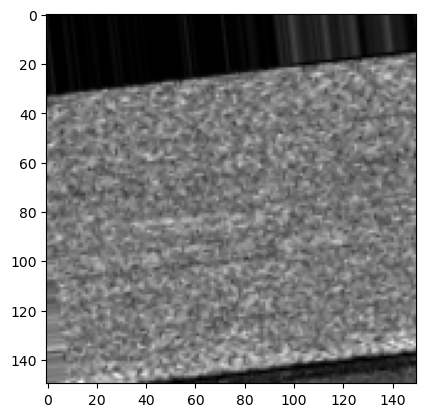

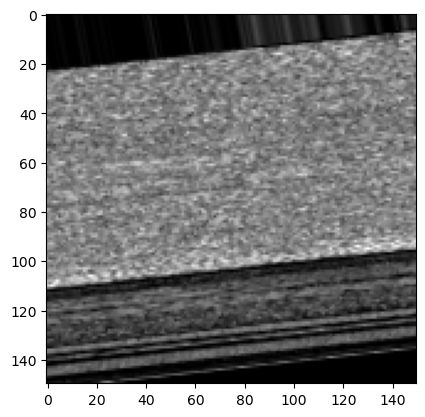

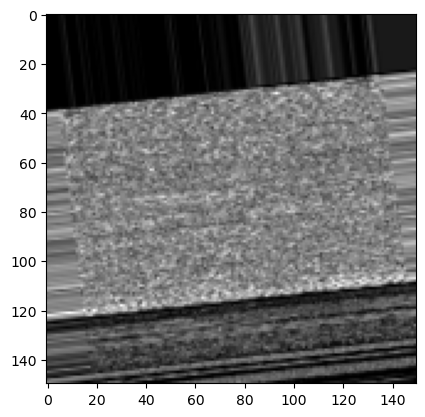

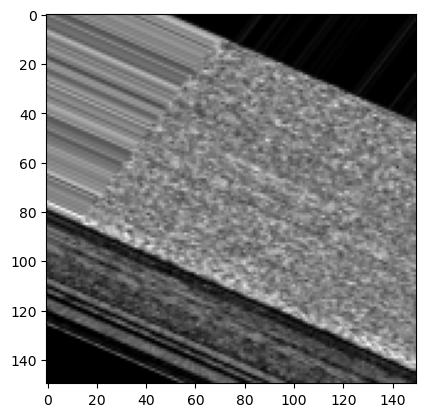

In [14]:
# Lets see the image augmentaion
from tensorflow.keras.preprocessing import image
img = image.load_img(os.path.join(train_bfiles_dir, os.listdir(train_cfiles_dir)[1]), target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [15]:
# Apply the data augmentation to our data.
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [16]:
# We need to normalize the pixels in the images.  The data will 'flow' through this generator.
test_datagen2 = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator2 = train_datagen2.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator2 = test_datagen2.flow_from_directory( # Resize test data
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Setup Base Model 

In [19]:
# Build a model
def Base_CNN():
  backend.clear_session()
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

In [21]:
model = Base_CNN()

Epoch 1/50


100/100 [==============================] - 19s 182ms/step - loss: 0.1451 - accuracy: 0.9695 - val_loss: 2.1582 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 18s 177ms/step - loss: 0.0403 - accuracy: 0.9925 - val_loss: 2.5142 - val_accuracy: 0.5020
Epoch 3/50
100/100 [==============================] - 18s 177ms/step - loss: 0.0586 - accuracy: 0.9920 - val_loss: 2.7675 - val_accuracy: 0.5000
Epoch 4/50
100/100 [==============================] - 18s 178ms/step - loss: 0.0257 - accuracy: 0.9950 - val_loss: 0.0554 - val_accuracy: 0.9780
Epoch 5/50
100/100 [==============================] - 18s 179ms/step - loss: 0.0323 - accuracy: 0.9950 - val_loss: 0.0272 - val_accuracy: 0.9950
Epoch 6/50
100/100 [==============================] - 18s 180ms/step - loss: 0.0498 - accuracy: 0.9915 - val_loss: 0.0074 - val_accuracy: 0.9980
Epoch 7/50
100/100 [==============================] - 18s 178ms/step - loss: 0.0240 - accuracy: 0.9955 - val_loss: 0.1009 - val_

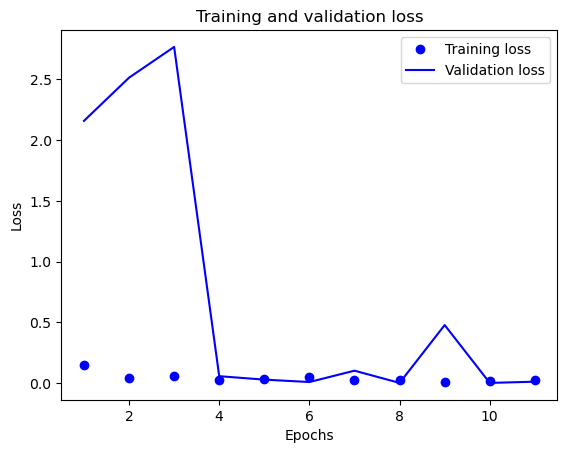

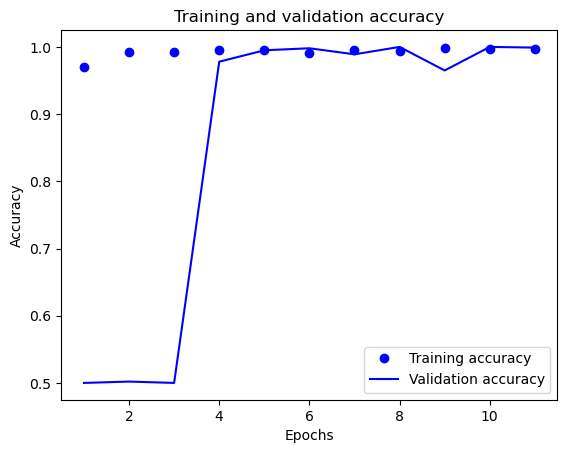

50/50 [==============================] - 2s 31ms/step - loss: 0.1482 - accuracy: 0.9880
test_acc: 0.9879999756813049


In [22]:
history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validataion_generator2,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])


plot_history()

test_loss, test_acc = model.evaluate(test_generator2, steps = 50)
print('test_acc:', test_acc)

model.save('cfiles_and_bfiles_base_augment.h5')

# Conclusion
In this notebook I opted to try data augmentation. I'm still concerned that reuse of train data for validation could taint results but my previous setup should have revealed that at only 50% accuracy. Data augmentation has produced a 98% accuracy with a very simple CNN model. My inital speculation is that the model can very easily discrimenate between images with hard lines or edges as in bFiles compared to the general static images in cFiles, as shown below.

### Show cFile Augmentation

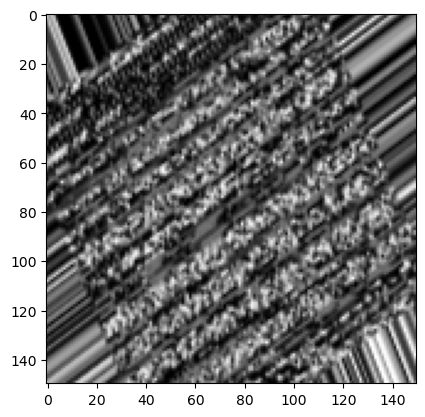

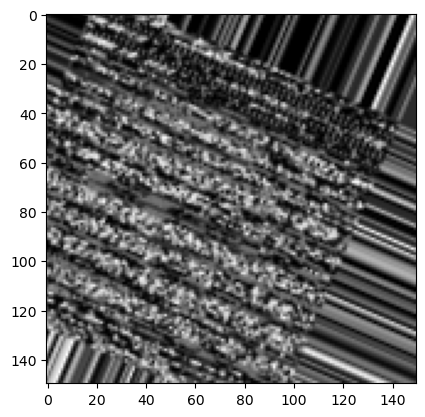

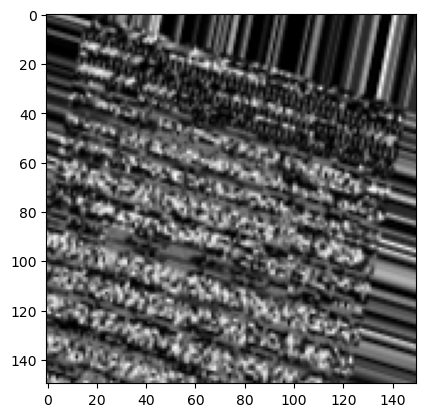

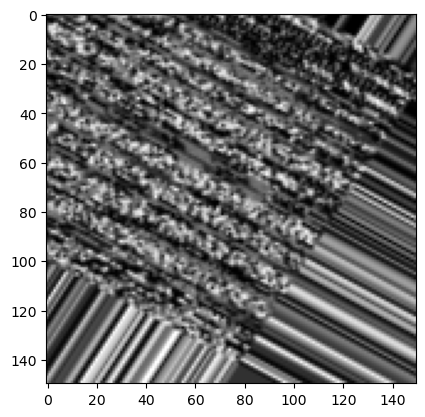

In [23]:
# Lets see the image augmentaion
from tensorflow.keras.preprocessing import image
img = image.load_img(os.path.join(train_cfiles_dir, os.listdir(train_cfiles_dir)[1]), target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Show bFile Augmentation

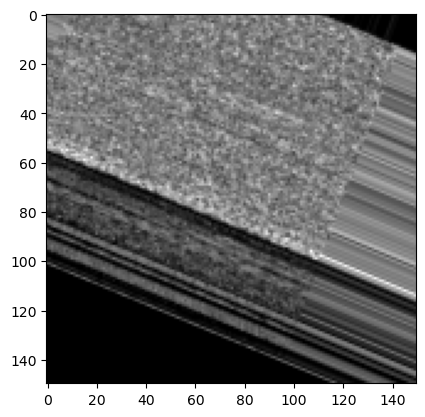

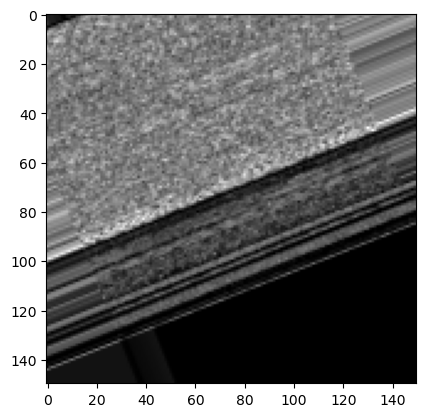

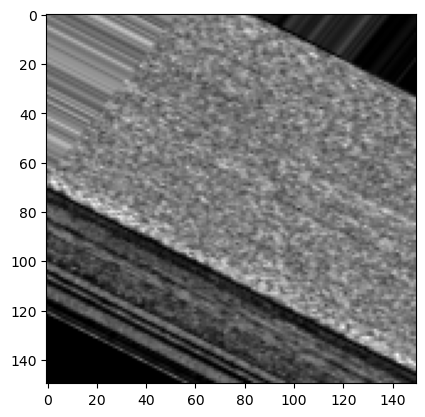

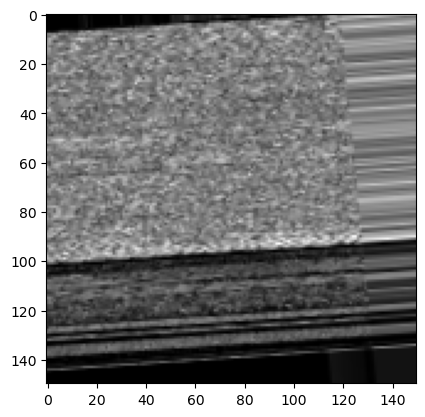

In [24]:
# Lets see the image augmentaion
from tensorflow.keras.preprocessing import image
img = image.load_img(os.path.join(train_bfiles_dir, os.listdir(train_bfiles_dir)[1]), target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()